# fipy Binary Electrolyte

In [1]:
%matplotlib inline
from fipy import *
import numpy as np
import matplotlib.pyplot as pl

## Parameters

In [17]:
L=0.001 # cm
nx= 50 # number of cells

C10= 1e-3 # mol/cm3, copper concentration
C1S=C10/2

D1= 2E-5 # cm2/s
D2= 5.3E-5  # cm2/s

z1=+2
z2=-2

n=2   # eq/mol Cu
F=96485 # C/eq
Rg=8.314 # J/mol/K
T=298 # K
f=F/Rg/T

u1=D1/Rg/T
u2=D2/Rg/T

## Mesh

In [18]:
mesh = Grid1D(nx=nx, dx=1.0/nx)

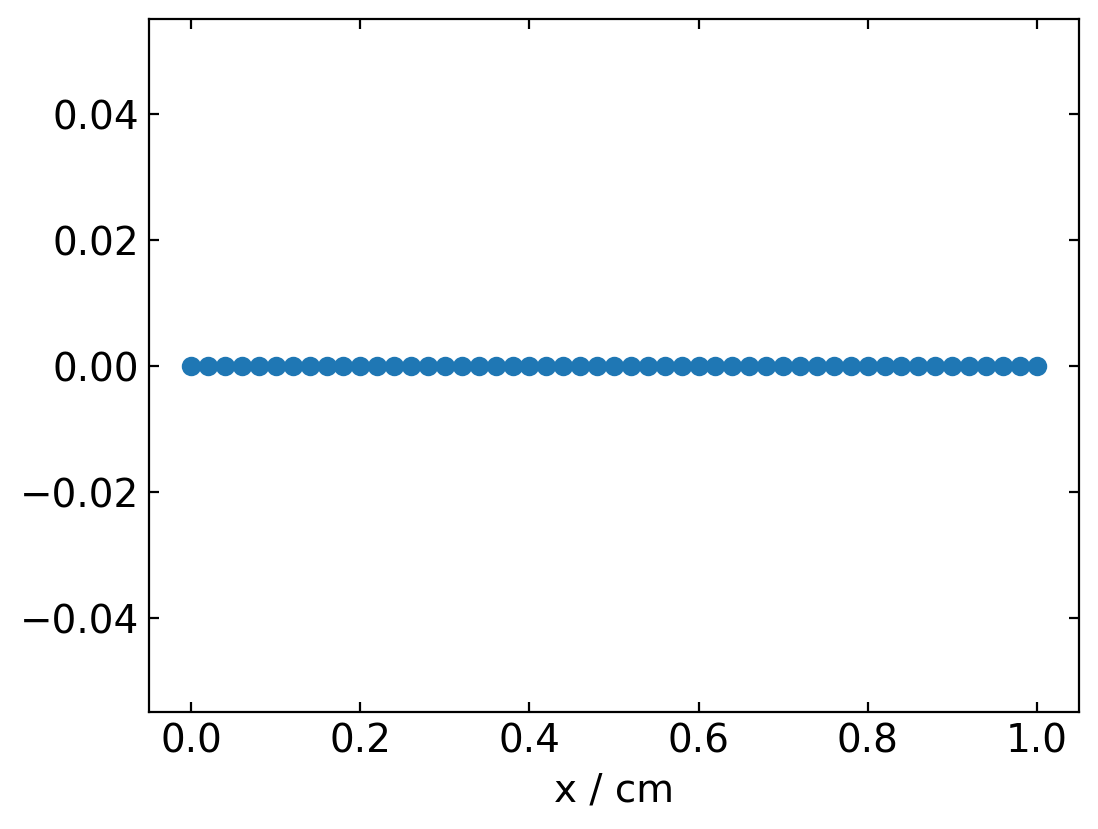

In [19]:
x=np.asarray(mesh.faceCenters)[0]
xc=np.asarray(mesh.cellCenters)[0]
pl.plot(x,np.zeros_like(x),'-o')
pl.xlabel('x / cm')
pl.show()

## Species

In [20]:
C1= CellVariable(name = "Cu2+",
                   mesh = mesh,
                   value = 1.0)
# electroneutrality
C2 = -1/z2 * (z1*C1)
C2.name="Sulfate"

phi = CellVariable(name = "potential",
                   mesh = mesh,
                   value = 0.0)

## Boundary Conditions

In [21]:
#Concentration BC's
C1.constrain(1.0, mesh.facesRight)
phi.constrain(0, mesh.facesRight)
C1.constrain(C1S/C10, mesh.facesLeft)

## Governing Equations

In [22]:
migr_coeff_1= -z1*C1
migr_coeff_2= -z2*C2

Eq1= DiffusionTerm(coeff=migr_coeff_1, var=phi) - DiffusionTerm(coeff=1.0, var=C1)
Eq2= DiffusionTerm(coeff=migr_coeff_2, var=phi) -  (C2.faceGrad).divergence 

Eqns = Eq1 & Eq2

## Solution

In [23]:
res = 1e+10
restol= 1e-6
while res > restol:
    res = Eqns.sweep()
    print(res)

50.0
0.7071067811865481
0.01743896893292207
0.00034588074663131674
6.918757808404579e-06
1.3837469676198756e-07


## Analytical Solution

In [24]:
phi_a=-1.0/z2*np.log(C1)

## Comparison

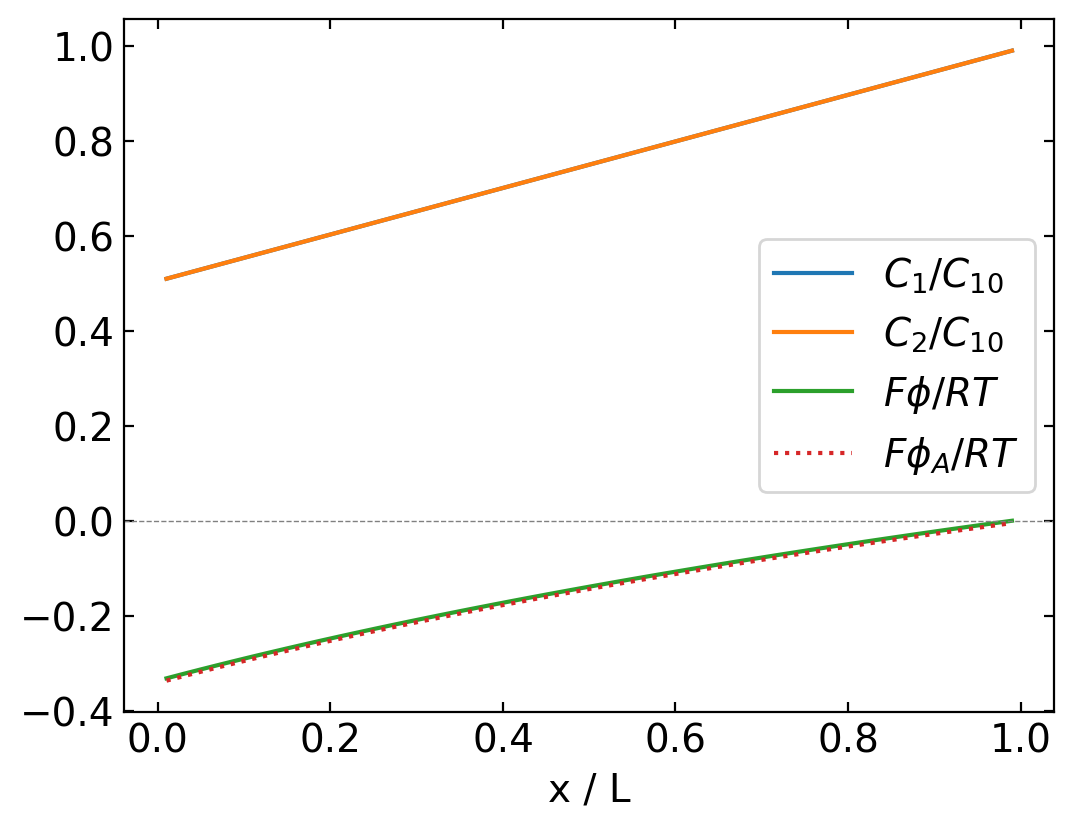

In [27]:
pl.plot(xc,C1.value, label='$C_1/C_{10}$')
pl.plot(xc,C2.value, label='$C_2/C_{10}$')
pl.plot(xc,phi.value, label=r'$F\phi / RT$')
pl.plot(xc,phi_a.value, ':', label=r'$F\phi_A / RT$')
pl.gca().axhline(0.0, linestyle='--', color='gray', linewidth=0.5)

pl.xlabel('x / L')
pl.legend(loc=7)
pl.show()

## Check electroneutrality

In [28]:
rho= z1*C1 + z2*C2

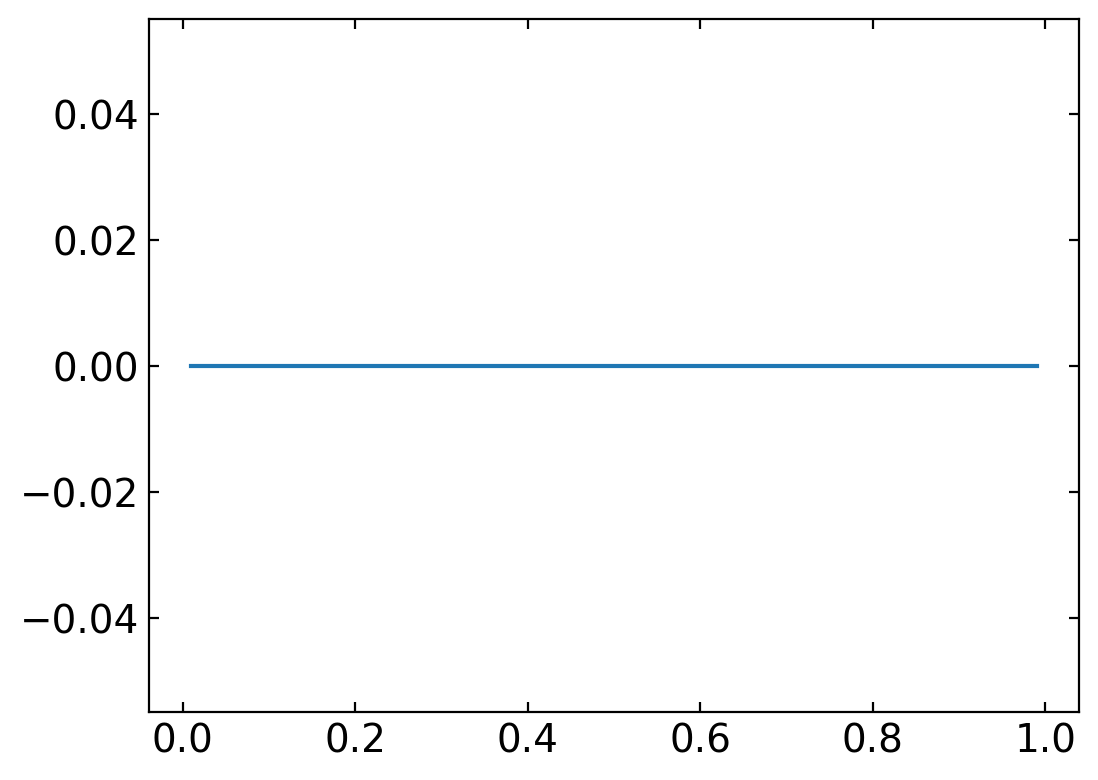

In [30]:
pl.plot(xc,rho.value)
pl.show()

## Check flux

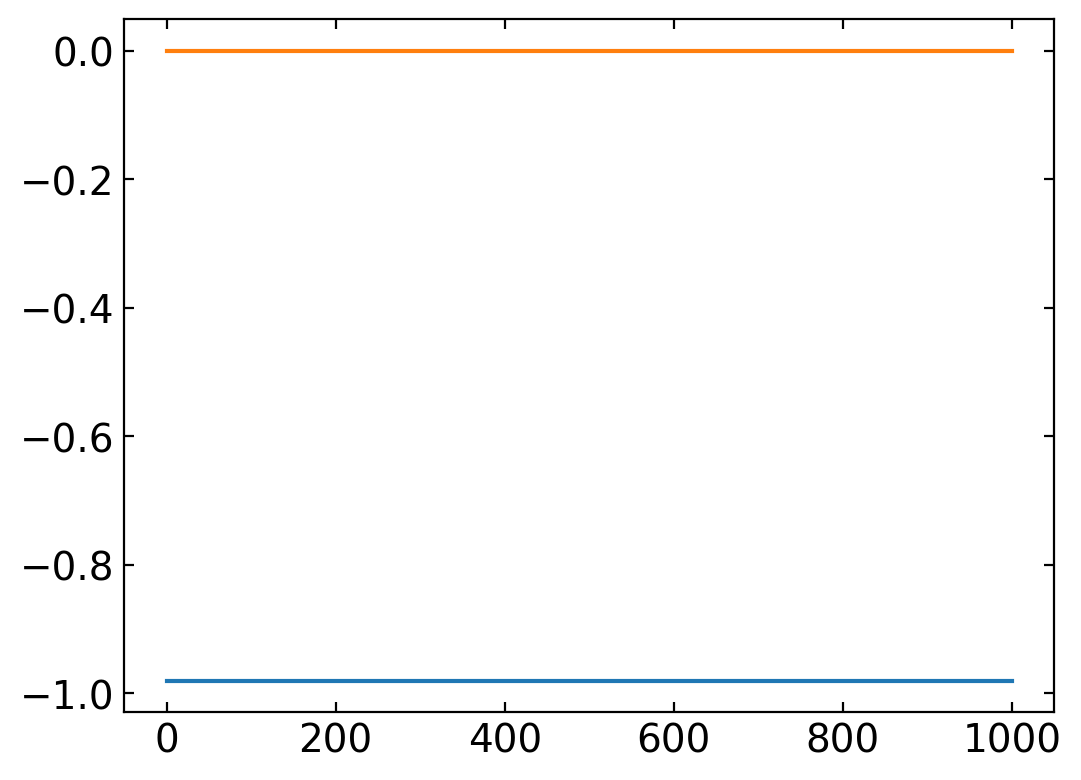

In [31]:
# This is diminsionless, Ni(dim) * (L/Di*Ci)

N1= -z1*C1.faceValue*phi.faceGrad - C1.faceGrad
N2= -z2*C2.faceValue*phi.faceGrad - C2.faceGrad

pl.plot(x/L,N1.value[0])
pl.plot(x/L,N2.value[0])

pl.show()